In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
# Labels for classification (0 = Normal, 1 = Fraud)
LABELS = ["Normal", "Fraud"]

In [3]:
data = pd.read_csv("/content/creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47628 non-null  int64  
 1   V1      47628 non-null  float64
 2   V2      47628 non-null  float64
 3   V3      47628 non-null  float64
 4   V4      47628 non-null  float64
 5   V5      47628 non-null  float64
 6   V6      47628 non-null  float64
 7   V7      47628 non-null  float64
 8   V8      47628 non-null  float64
 9   V9      47628 non-null  float64
 10  V10     47628 non-null  float64
 11  V11     47628 non-null  float64
 12  V12     47628 non-null  float64
 13  V13     47628 non-null  float64
 14  V14     47628 non-null  float64
 15  V15     47628 non-null  float64
 16  V16     47628 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22

In [5]:
print(data.isnull().values.any())

True


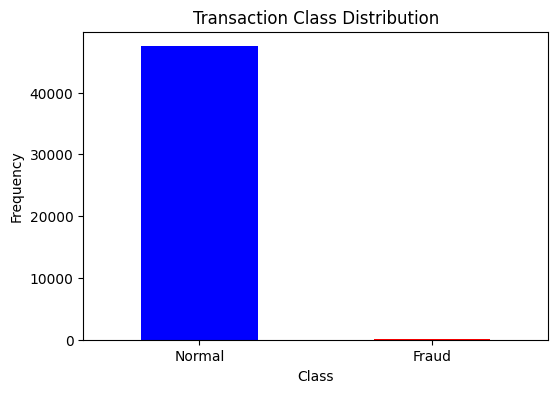

In [6]:
count_classes = data["Class"].value_counts()
plt.figure(figsize=(6, 4))
count_classes.plot(kind="bar", rot=0, color=["blue", "red"])
plt.title("Transaction Class Distribution")
plt.xticks(ticks=[0, 1], labels=LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [7]:
fraud = data[data["Class"] == 1]
normal = data[data["Class"] == 0]
print(f"Fraud Cases: {len(fraud)}")
print(f"Normal Cases: {len(normal)}")
fraud_percentage = (len(fraud) / len(data)) * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

Fraud Cases: 146
Normal Cases: 47481
Fraud Percentage: 0.3065%


In [8]:
fraud_amount_stats = fraud["Amount"].describe()
print(fraud_amount_stats)

count     146.000000
mean      100.769589
std       234.865142
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [9]:
normal_amount_stats = normal["Amount"].describe()
print(normal_amount_stats)

count    47481.000000
mean        91.749512
std        249.864438
min          0.000000
25%          7.600000
50%         24.990000
75%         83.000000
max      12910.930000
Name: Amount, dtype: float64


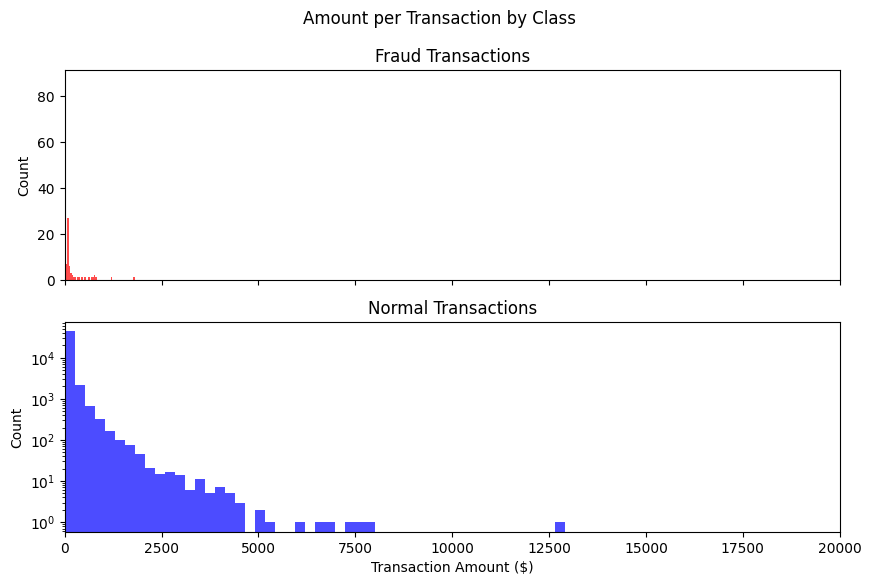

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.suptitle("Amount per Transaction by Class")
bins = 50
ax1.hist(fraud["Amount"], bins=bins, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Count")
ax2.hist(normal["Amount"], bins=bins, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Transaction Amount ($)")
ax2.set_ylabel("Count")
plt.xlim((0, 20000))
plt.yscale("log")
plt.show()

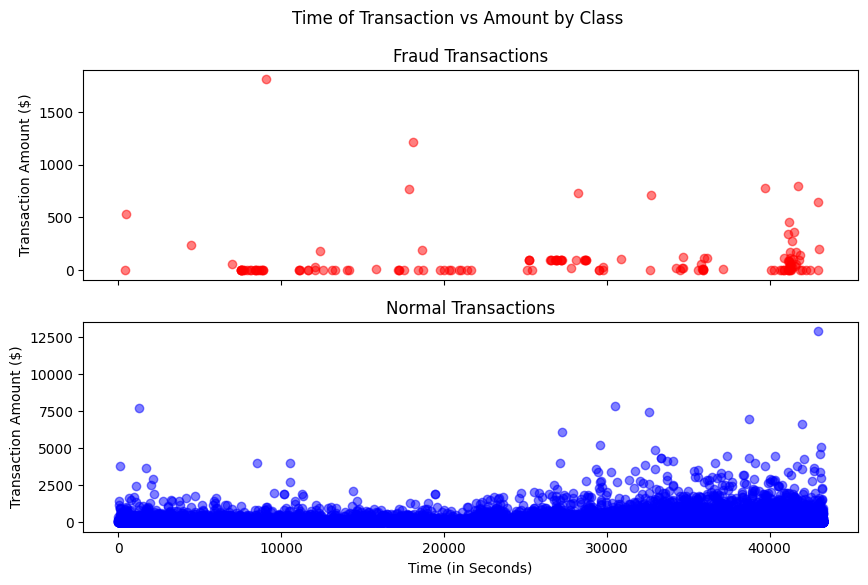

In [11]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.suptitle("Time of Transaction vs Amount by Class")
ax1.scatter(fraud["Time"], fraud["Amount"], color="red", alpha=0.5)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Transaction Amount ($)")
ax2.scatter(normal["Time"], normal["Amount"], color="blue", alpha=0.5)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Time (in Seconds)")
ax2.set_ylabel("Transaction Amount ($)")
plt.show()

In [12]:
data1=data.sample(frac=0.1,random_state=1)
data1.shape

(4763, 31)

In [13]:
Fraud = data1[data1["Class"] == 1]
Valid = data1[data1["Class"] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(f"Outlier Fraction (Fraud Cases / Normal Cases): {outlier_fraction:.6f}")
print(f"Fraud Cases: {len(Fraud)}")
print(f"Valid Cases: {len(Valid)}")

Outlier Fraction (Fraud Cases / Normal Cases): 0.002948
Fraud Cases: 14
Valid Cases: 4749


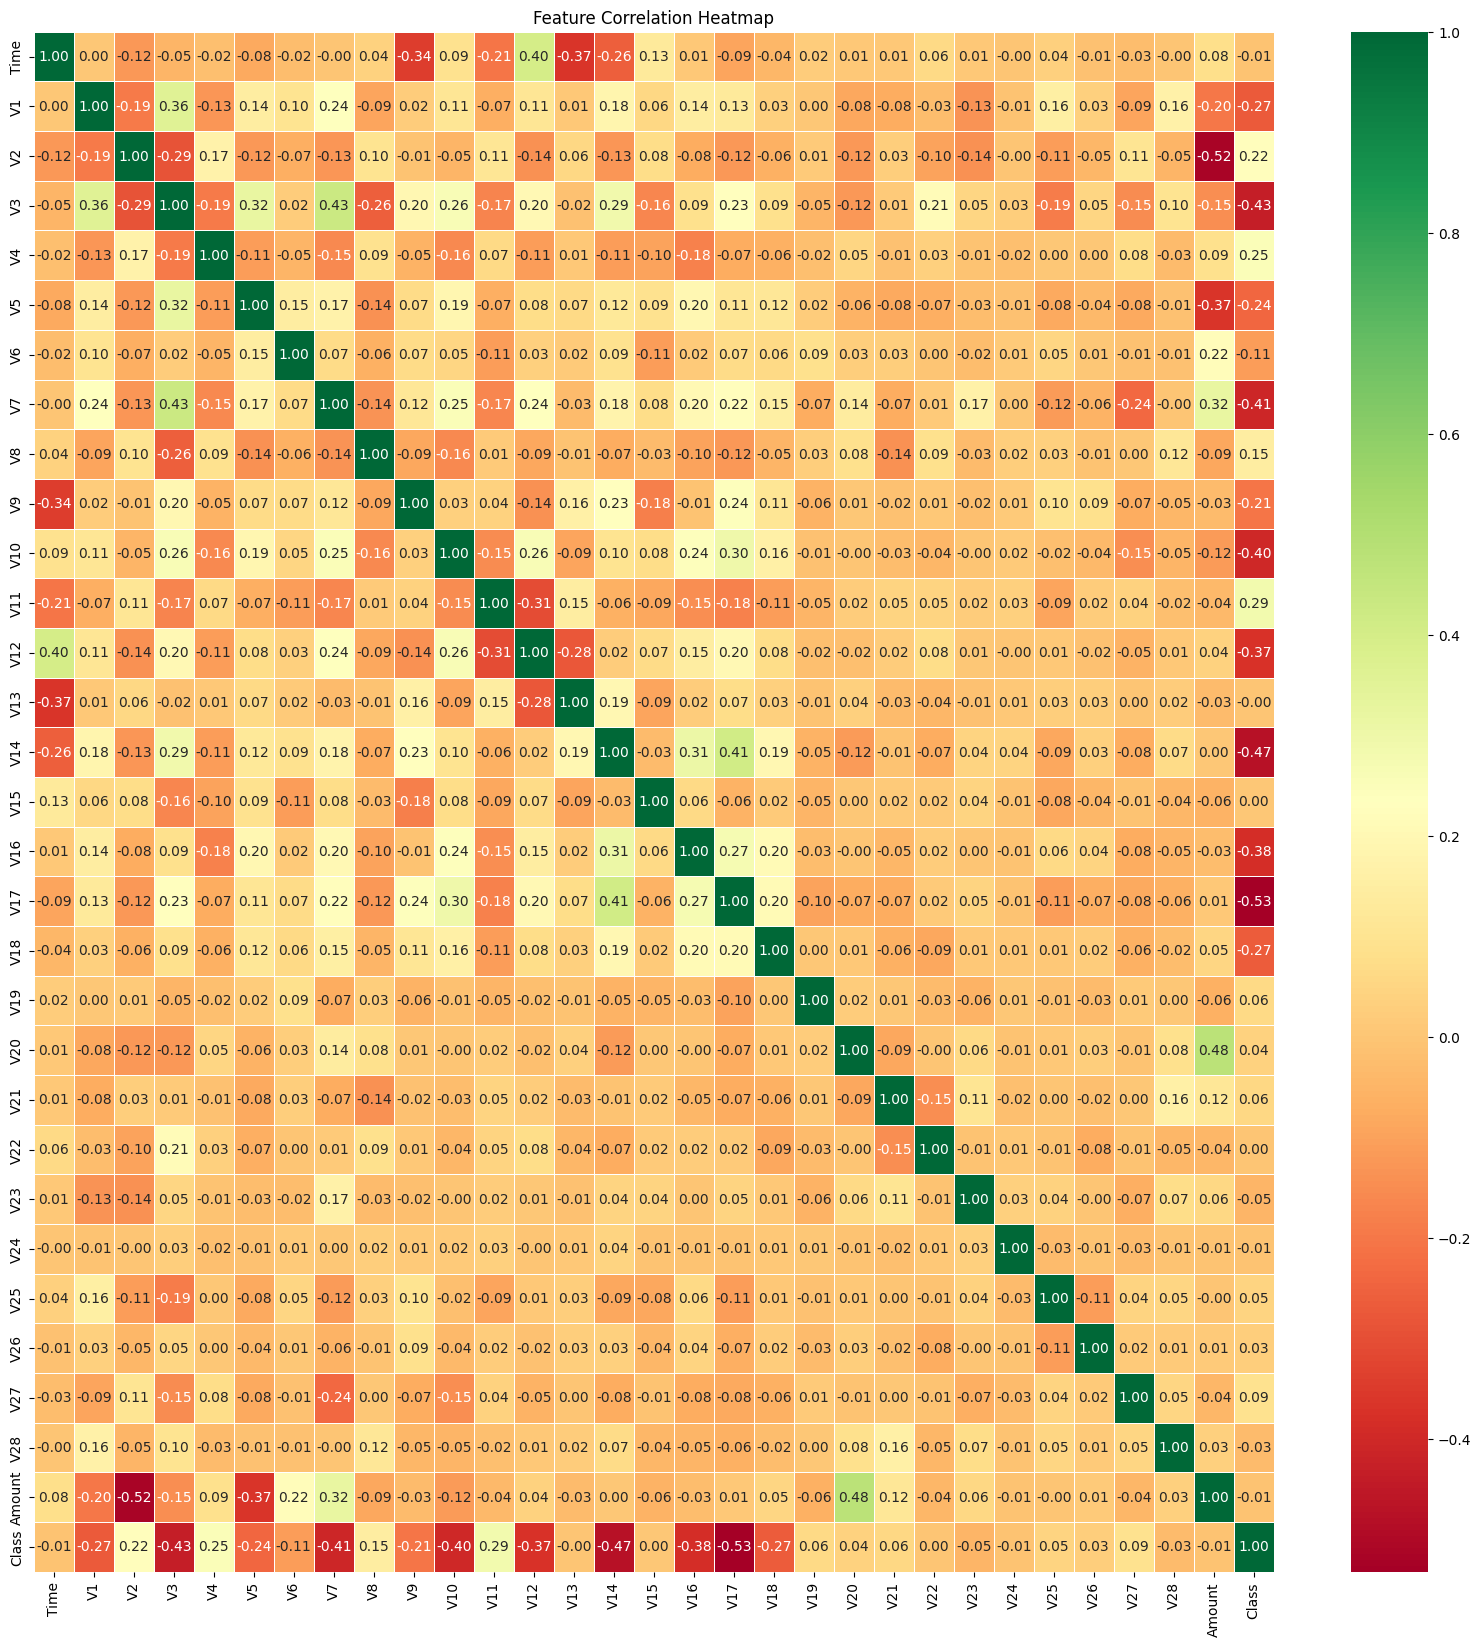

In [14]:
corrmat = data1.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
columns = data1.columns.tolist()
columns = [c for c in columns if c != "Class"]
target = "Class"
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print("Feature Matrix Shape (X):", X.shape)
print("Target Vector Shape (Y):", Y.shape)

Feature Matrix Shape (X): (4763, 30)
Target Vector Shape (Y): (4763,)


In [16]:
classifiers = {
    "Isolation Forest": IsolationForest(
        n_estimators=100,
        max_samples=len(X),
        contamination=outlier_fraction,
        random_state=state,
        verbose=0
    ),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        algorithm='auto',
        leaf_size=30,
        metric='minkowski',
        p=2,
        contamination=outlier_fraction
    ),
    "Support Vector Machine": OneClassSVM(
        kernel='rbf',
        degree=3,
        gamma=0.1,
        nu=0.05,
        max_iter=-1
    )
}

In [17]:
from sklearn.metrics import classification_report, accuracy_score
n_outliers=len(fraud)
for clf_name,clf in classifiers.items():
  print(f"\nTraining{clf_name}...")
  if clf_name=="Local Outlier Factor":
    y_pred=clf.fit_predict(X)
    scores_pred=clf.negative_outlier_factor_
  elif clf_name=="Support Vector Machine":
    clf.fit(X)
    y_pred=clf.predict(X)
  else:
    clf.fit(X)
    scores_prediction=clf.decision_function(X)
    y_pred=clf.predict(X)
  y_pred=np.where(y_pred==1 ,0,1)
  n_errors=(y_pred!=Y).sum()
  print(f"Model: {clf_name}")
  print(f"Number of Misclassified Transactions: {n_errors}")
  print(f"Accuracy Score: {accuracy_score(Y, y_pred):.4f}")
  print("Classification Report:")
  print(classification_report(Y, y_pred))


TrainingIsolation Forest...
Model: Isolation Forest
Number of Misclassified Transactions: 11
Accuracy Score: 0.9977
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       0.60      0.64      0.62        14

    accuracy                           1.00      4763
   macro avg       0.80      0.82      0.81      4763
weighted avg       1.00      1.00      1.00      4763


TrainingLocal Outlier Factor...
Model: Local Outlier Factor
Number of Misclassified Transactions: 29
Accuracy Score: 0.9939
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       0.00      0.00      0.00        14

    accuracy                           0.99      4763
   macro avg       0.50      0.50      0.50      4763
weighted avg       0.99      0.99      0.99      4763


TrainingSupport Vector Machine...
Model: Support Vector M